## Assignment 6A:
### This 2nd part of the notebook uses Tensorflow 2
#### Fix the network:
Remove dense,
add layers required to reach RF,
fix kernel scaleup and down (1x1),
see if all dropouts are properly placed,
follow the guidelines we discussed in the class (
Get accuracy more than the base accuracy in less number 100 epochs. Hint, you might want to use "border_mode='same',"

In [11]:
!pip install tensorflow-gpu

     |████████████████████████████████| 380.8MB 81kB/s 
     |████████████████████████████████| 3.8MB 31.1MB/s 
     |████████████████████████████████| 450kB 30.9MB/s 
ERROR: tensorflow 1.15.0rc3 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.0 which is incompatible.
ERROR: tensorflow 1.15.0rc3 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
# from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
import tensorflow as tf
import tensorflow.keras as tfk


# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D
# from tensorflow.keras.layers import Activation, Flatten, Dense, Dropout
# from tensorflow.keras.layers import BatchNormalization
# from keras.utils import np_utils

In [2]:
tf.__version__

'2.0.0'

In [3]:
# Load cifar using the load data function
# The data is in the shape of (Batch_size, num_channel, width, height)
# np.unique returns unique class names

from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

Using TensorFlow backend.


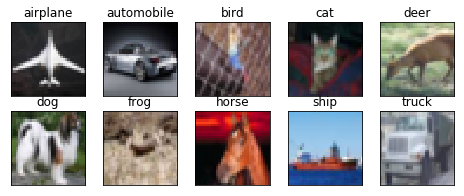

In [4]:
# Visualization of some particular classes from the dataset

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5,1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
# This function plots 2 graph --> model acc(train,val) vs epoch/ model loss(train,val) vs epoch

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
# Returns accuracy on test data

def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
# Normalize data
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# Convert class labels to binary class labels
train_labels = tfk.utils.to_categorical(train_labels, num_classes)
test_labels = tfk.utils.to_categorical(test_labels, num_classes)

In [9]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 16s 42ms/step - loss: 1.8409 - acc: 0.2939 - val_loss: 1.4234 - val_acc: 0.4731
Epoch 2/100
390/390 [==============================] - 9s 22ms/step - loss: 1.3380 - acc: 0.5188 - val_loss: 1.1599 - val_acc: 0.5866
Epoch 3/100
390/390 [==============================] - 9s 22ms/step - loss: 1.1203 - acc: 0.6023 - val_loss: 0.9694 - val_acc: 0.6615
Epoch 4/100
390/390 [==============================] - 9s 22ms/step - loss: 0.9805 - acc: 0.6580 - val_loss: 0.8878 - val_acc: 0.6888
Epoch 5/100
390/390 [==============================] - 9s 22ms/step - loss: 0.8797 - acc: 0.6942 - val_loss: 0.8677 - val_acc: 0.7044
Epoch 6/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8159 - acc: 0.7179 - val_loss: 0.7542 - val_acc: 0.7409
Epoch 7/100
390/390 [==============================] - 9s 22ms/step - loss: 0.7507 - acc: 0.7430 - val_loss: 0.7106 - val_acc: 0.7598
Epoch 8/100
390/390 [==============================] - 9s 22m

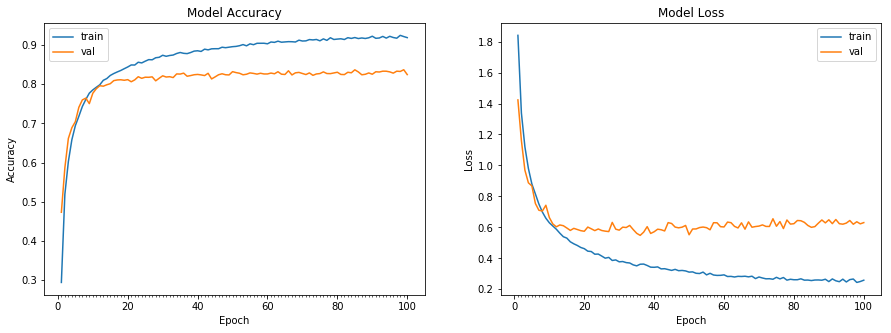

Accuracy on test data is: 82.45


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Adding new model to fix the accuracy


In [0]:
# Define the model

input_tensor = tfk.layers.Input((32,32,3))
x = tfk.layers.Conv2D(32, 3, padding='same',activation = 'relu')(input_tensor)
x = tfk.layers.Dropout(.2)(x)
x = tfk.layers.BatchNormalization()(x)

x = tfk.layers.Conv2D(64, 3, padding='same',activation = 'relu')(x)
x = tfk.layers.Dropout(.2)(x)
x = tfk.layers.BatchNormalization()(x)

x = tfk.layers.Conv2D(128, 3, activation = 'relu')(x)
x = tfk.layers.Dropout(.2)(x)
x = tfk.layers.BatchNormalization()(x)

x = tfk.layers.MaxPooling2D(2,2)(x)
x = tfk.layers.Conv2D(32, 1, activation = 'relu')(x)
x = tfk.layers.Dropout(.2)(x)
x = tfk.layers.BatchNormalization()(x)


x = tfk.layers.Conv2D(64, 3, activation = 'relu', padding='same')(x)
x = tfk.layers.Dropout(.1)(x)
x = tfk.layers.BatchNormalization()(x)

x = tfk.layers.Conv2D(128, 3, activation = 'relu', padding='same')(x)
x = tfk.layers.Dropout(.1)(x)
x = tfk.layers.BatchNormalization()(x)


x = tfk.layers.MaxPooling2D(2,2)(x)
x = tfk.layers.Conv2D(32, 1, activation = 'relu')(x)
x = tfk.layers.Dropout(.2)(x)
x = tfk.layers.BatchNormalization()(x)

x = tfk.layers.Conv2D(64, 3, activation = 'relu', padding='same')(x)
x = tfk.layers.Dropout(.1)(x)
x = tfk.layers.BatchNormalization()(x)

x = tfk.layers.Conv2D(128, 3, activation = 'relu' , padding='same')(x)
x = tfk.layers.Dropout(.1)(x)
x = tfk.layers.BatchNormalization()(x)

x = tfk.layers.Conv2D(10,1)(x)
x = tfk.layers.GlobalAveragePooling2D()(x)
x = tfk.layers.Activation(tf.nn.softmax)(x)
model = tfk.models.Model(input_tensor,x)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256   

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
import os
# Define the callbacks --> checkpoint and learning rate schedular
base_dir = '/content/drive/My Drive/EVA/Session6'

def scheduler(epoch, lr):
    return round(0.003 * 1 / (1 + 0.319 * epoch), 10)

if not (os.path.exists(os.path.join(base_dir, 'weights'))):
    os.mkdir(os.path.join(base_dir, 'weights'))

filepath = os.path.join('/content/drive/My Drive/EVA/Session6/weights',
                        'weights-improvement-best.hdf5')

checkpoint = tfk.callbacks.ModelCheckpoint(filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')


Epoch 00001: LearningRateScheduler reducing learning rate to 0.003.
Epoch 1/100
390/391 [============================>.] - ETA: 0s - loss: 0.6553 - accuracy: 0.7718
Epoch 00001: val_accuracy improved from -inf to 0.76720, saving model to /content/drive/My Drive/EVA/Session6/weights/weights-improvement-best.hdf5
391/391 [==============================] - 86s 221ms/step - loss: 0.6552 - accuracy: 0.7719 - val_loss: 0.6676 - val_accuracy: 0.7672

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0022744503.
Epoch 2/100
390/391 [============================>.] - ETA: 0s - loss: 0.5817 - accuracy: 0.7965
Epoch 00002: val_accuracy did not improve from 0.76720
391/391 [==============================] - 82s 209ms/step - loss: 0.5818 - accuracy: 0.7964 - val_loss: 0.6899 - val_accuracy: 0.7628

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0018315018.
Epoch 3/100
390/391 [============================>.] - ETA: 0s - loss: 0.5347 - accuracy: 0.8126
Epoch 00003: val_

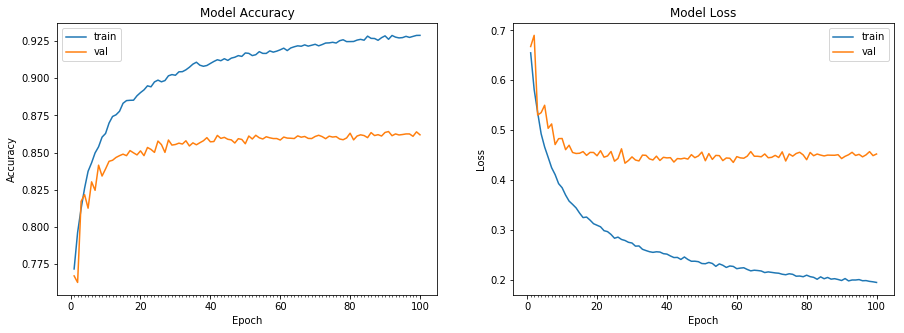

Accuracy on test data is: 86.20


In [0]:
datagen = tfk.preprocessing.image.ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

# Compile the model
model.compile(optimizer = tf.optimizers.Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128), epochs = 100,
                                 validation_data = (test_features, test_labels), verbose=1,
                                callbacks=[tfk.callbacks.LearningRateScheduler(scheduler, verbose=1), checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
model_info.history

{'accuracy': [0.72584],
 'loss': [0.7749623872947693],
 'lr': [0.003],
 'val_accuracy': [0.689],
 'val_loss': [0.8976153693621671]}